# Problem set 6: Spring 2022

Due: Friday, March 11th at midnight (12AM)

In [1]:
# Load necessary python libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# For time checks
import time

# Scikit learn models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor

# Cross-validation helpers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

# Polynomial generator
from sklearn.preprocessing import PolynomialFeatures

# Set random seed, so our results are similar
# Where does 42 come from?
np.random.seed(42)

# Starter functions

In [2]:
# Function to generate linear data experiments
def genLinData(m,n,R2):
    # y = x_1 + x_2 .. x_n + eps
    # X's scaled so the variance of explained part is 1
    # Function choses variance of noise to set theoretical R2 = R2 argument
    sigNoise = np.sqrt(1./n)
    X = np.random.normal(size=(m,n),loc=0,scale=sigNoise)
    noise = np.sqrt((1.-R2)/R2)
    eps = np.random.normal(size=m,loc=0,scale=noise)
    y = np.sum(X,axis=1)+eps
    return X,y

### A little preprocessing

In [3]:
# Set up initial monte-carlo simulation
X, y = genLinData(60,10,0.75)

# Expand features(X) using 2-degree polynomials
poly = PolynomialFeatures(degree=2,include_bias=False)
Xpoly = poly.fit_transform(X)
# A reminder of how big Xpoly is (remember it has cross terms like x1*x2, not just x1^2)
# n + n + n(n-1)/2 = 65
print(Xpoly.shape)

# Set up basic simulation parameters
nmc = 50 # number of randomized cross-validations
testSize = 0.25 # Test set fraction


(60, 65)


### 1. Linear regression

Run a monte-carlo cross-validation for a basic linear regression model using the nmc, and testSize parameters, and cross_Validate() as we usually do.  Report the mean score from both the training and test samples.  Do this for both the (y,X) pair, and the (y,Xpoly) pair.  In each case also report the elapsed time for your entire randomized cross validation experiment.

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
import time

lr = LinearRegression()
nmc = 50 # number of randomized cross-validations
testSize = 0.25 # Test set fraction
stime = time.time()
shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
CVInfo = cross_validate(lr, X, y, cv=shuffle,return_train_score=True)


etime = time.time()
print("Elapsed time:",etime-stime)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))


Elapsed time: 0.07481551170349121
0.7843937702979177
0.555999850455543


In [49]:
lr = LinearRegression()
nmc = 50 # number of randomized cross-validations
testSize = 0.25 # Test set fraction

stime = time.time()
shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
CVInfo = cross_validate(lr, Xpoly, y, cv=shuffle,return_train_score=True)

etime = time.time()
print("Elapsed time:",etime-stime)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))


Elapsed time: 0.10967302322387695
1.0
-1.1696686727079508


### 2. Stochastic gradient

Now estimate the model using a stochastic gradient system.  Use the scikit-Learn function SGDRegressor().
Set it up with the following parameters.

SGDRegressor(max_iter=500000, tol=1e-6,penalty="None",eta0=0.01,
                    alpha=0.0,learning_rate="adaptive")

Run a randomized cross-validation for both the (y,X) and (y,Xpoly) pairs using the nmc, testSize that you used in the last simulation.  Report the mean train and test scores in both cases.

Also, find the elapsed time for your entire randomized cross validation run.

Finally, try boosting the learning rate, eta, to 1.0 for the (y,Xpoly) case. How did that work?

In [50]:
# Cross-validation helpers
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit

nmc = 50 # number of randomized cross-validations
testSize = 0.25 # Test set fraction
stime = time.time()
sgd_reg = SGDRegressor(max_iter=500000, tol=1e-6, penalty=None, eta0=0.01,alpha=0.0,learning_rate="adaptive")

sgd_reg.fit(X, y)
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
CVInfo = cross_validate(sgd_reg, X, y, cv=shuffle,return_train_score=True)
etime = time.time()
print("Elapsed time:",etime-stime)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

Elapsed time: 0.11567330360412598
0.7817294515574925
0.5459274008951447


In [7]:
nmc = 50 # number of randomized cross-validations
testSize = 0.25 # Test set fraction
sgd_reg = SGDRegressor(max_iter=500000, tol=1e-6, penalty=None, eta0=0.01,alpha=0.0,learning_rate="adaptive")
stime = time.time()
sgd_reg.fit(Xpoly, y)
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
CVInfo = cross_validate(sgd_reg, Xpoly, y, cv=shuffle,return_train_score=True)
etime = time.time()
print("Elapsed time:",etime-stime)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

Elapsed time: 2.486431121826172
0.9884705550319387
-0.05924810560224368


In [8]:
#Change learning rate to 1
nmc = 50 # number of randomized cross-validations
testSize = 0.25 # Test set fraction
sgd_reg = SGDRegressor(max_iter=500000, tol=1e-6, penalty=None, eta0=1.0,alpha=0.0,learning_rate="adaptive")
stime = time.time()
sgd_reg.fit(Xpoly, y)
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
CVInfo = cross_validate(sgd_reg, Xpoly, y, cv=shuffle,return_train_score=True)
etime = time.time()
print("Elapsed time:",etime-stime)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

Elapsed time: 0.09374785423278809
-584389931.804977
-801913092.1663612


The elapsed time decreases after the learning rate is increased from 0.01 to 1.0 but the both the train and test score is negative and indicates that we set a the learning rate too large and there is unstable convergence due to large learning rate.

### 3. Early stopping

Now, implement an early stopping procedure for the stochastic gradient estimation.  Use the previous parameters for SGDRegressor(), but turn on early_stopping.  Set the validation_fraction to 1/3 of the data set.  Again, run the same randomized cross valiation experiment that you have done before, and report mean scores on training and test data.  Repeat this for (y,X) and (y,Xpoly).  Also, report the elapsed time in for each set of nmc simulations.

Note: Both of these can be pretty slow.  On my laptop machine (5 years old) the (y,Xpoly) run is taking about 5-10 minutes.  Run experiments on your code with much lower values for nmc.  Then when you know things are working take it back to the original value.  It is interesting that early stopping is so slow.

In [9]:
nmc = 50 # number of randomized cross-validations
testSize = 0.25 # Test set fraction
sgd_reg = SGDRegressor(max_iter=500000, tol=1e-6, penalty=None, eta0=0.01,alpha=0.0,
                       early_stopping=True,validation_fraction=1./3,learning_rate="adaptive")
stime = time.time()
sgd_reg.fit(X, y)
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
CVInfo = cross_validate(sgd_reg, X, y, cv=shuffle,return_train_score=True)
etime = time.time()
print("Elapsed time:",etime-stime)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))


Elapsed time: 4.616688966751099
0.6314160914116245
0.39122643273772


In [52]:
# Set up randomized cross validation (y,Xpoly) pair
nmc = 50 # number of randomized cross-validations
testSize = 0.25 # Test set fraction
sgd_reg = SGDRegressor(max_iter=500000, tol=1e-6, penalty=None, eta0=0.01,alpha=0.0,
                       early_stopping=True,validation_fraction=1./3,learning_rate="adaptive")
stime = time.time()
sgd_reg.fit(Xpoly, y)
shuffle = ShuffleSplit(n_splits=nmc, test_size=testSize)
CVInfo = cross_validate(sgd_reg, Xpoly, y, cv=shuffle,return_train_score=True)
etime = time.time()
print("Elapsed time:",etime-stime)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

Elapsed time: 110.02876305580139
0.6384744377101196
0.2460967790231116


### 4. Batch gradient descent

Estimate the model using a batch gradient descent model.  See the "earlyStopping" notebook for examples on how to implement this.  (It is tricky in terms of code.)

Do a randomized cross-validation here using the same parameters as before, but this will be tricky because of the way the model gets implemented.  You cannot use cross_validate().  You need to go back to train_test_split(), and loop over the train/test draws as we did the first time in the class with this.  Also, for the batch estimation, use 1000 epochs (or passes through the data).

Again, report mean scores on training and testing data, and elapsed time for the entire procedure.

In this case, only use the (y,Xpoly) data.

In [21]:
sgd_reg = SGDRegressor(max_iter=500000, tol=1e-6, penalty=None, eta0=0.01,alpha=0.0,learning_rate="adaptive")
nmc = 50 # number of randomized cross-validations
testSize = 0.25 # Test set fraction
stime = time.time()
testScore = np.zeros(nmc)
trainScore = np.zeros(nmc)
for i in range(nmc):
    Xpoly_train, Xpoly_test, y_train, y_test = train_test_split(Xpoly,y,test_size=0.25)
    for epoch in range(1000):
        sgd_reg.partial_fit(Xpoly_train,y_train)
    trainScore[i] = sgd_reg.score(Xpoly_train,y_train)
    testScore[i]  = sgd_reg.score(Xpoly_test,y_test)

etime = time.time()
print("Elapsed time:",etime-stime)
print(np.mean(trainScore))
print(np.mean(testScore))  


Elapsed time: 7.8689868450164795
0.9941305123388869
0.8913391935299978


### 5. Ridge regression

Now try a ridge regresion with (y, Xpoly) data only.  Perform a grid search (using a for loop) with alpha in the following range.

np.arange(start=0.1,stop=3.0,step=0.1)

For each alpha find the mean train and test scores (R-squared) from a randomized cross-validation (same params as before).

Plot the test and train mean scores against the alpha values.

Record your bestAlpha from the test data.

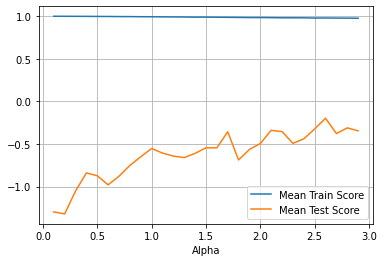

In [58]:
from sklearn.pipeline import make_pipeline
testScoreList = []
trainScoreList = []
nmc = 50
shuffle = ShuffleSplit(n_splits=nmc, test_size=.25)
# List of C's to try
alphas = np.arange(start=0.1,stop=3.0,step=0.1)
for a in alphas:
    fullModel = make_pipeline(StandardScaler(), Ridge(alpha=a))
    CVInfo = cross_validate(fullModel, Xpoly, y, cv=shuffle,return_train_score=True,n_jobs=-1)
    trainScoreList.append(np.mean(CVInfo['train_score']))
    testScoreList.append(np.mean(CVInfo['test_score']))

# plotting
plt.plot(alphas,trainScoreList,label='Mean Train Score')
plt.plot(alphas,testScoreList,label='Mean Test Score')
plt.xlabel('Alpha')
plt.legend()
plt.grid()

In [66]:
best_index = testScoreList.index(max(testScoreList))
print("Best Mean Test Score", max(testScoreList))
bestAlpha = round(alphas[best_index],1) 
print("Best Alpha:", bestAlpha)

Best Mean Test Score -0.19772168312331323
Best Alpha: 2.6


### 6. Ridge regression summary

Run our usual randomized monte-carlo trial for ridge regression using your bestAlpha value.  Same parameters as before.  Do this with only the (y,Xpoly) pairs and report the mean train and test scores.  Also, report the elapsed time.

In [67]:
stime = time.time()
ridge = Ridge(alpha=bestAlpha)
CVInfo = cross_validate(ridge, Xpoly, y, cv=shuffle,return_train_score=True)
etime = time.time()
rtimeP = etime-stime
print("\n(y, Xpoly) pair")
print("Mean Train Score:", np.mean(CVInfo['train_score']))
print("Mean Test Score:", np.mean(CVInfo['test_score']))
print("Elapsed Time:",rtimeP)


(y, Xpoly) pair
Mean Train Score: 0.7155116537732595
Mean Test Score: 0.41615276416436087
Elapsed Time: 0.10569024085998535


### 7. Discsussion

Compare your results from your various models for the (y,Xpoly) case.  Which model performs best in terms of test R-squared?  What is your overall ranking of models?  (LinearRegression, Stochastic Gradient Descent, Stochastic Gradient Descent with Early Stopping, Batch Gradient Descent, and Ridge regression)

In terms of compute time how do the methods compare?




Linear Regression
Elapsed time: 0.10967302322387695
Test Score: -1.1696686727079508

Stochastic Gradient Descent
Elapsed time: 2.486431121826172
Test Score: -0.05924810560224368

Stochastic Gradient Descent with Early Stopping
Elapsed time: 110.02876305580139
Test Score: 0.2460967790231116

Batch Gradient Descent
Elapsed time: 7.8689868450164795
Test Score: 0.8913391935299978

Ridge Regression
Mean Test Score: 0.41615276416436087
Elapsed Time: 0.10569024085998535

In terms of test R-squared, Batch Gradient Descent performs best.
The overall rankings of the model would be:

1) Batch Gradient Descent
2) Ridge Regression 3) Stochastic Gradient Descent with Early Stopping 4) Stochastic Gradient Descent 5) Linear Regression

In terms of compute time, the rankings would be:

1) Ridge Regression 2) Linear Regression 3) Stochastic Gradient Descent 4) Batch Gradient Descent 5) Stochastic Gradient Descent with Early Stopping